# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
env_info = env.reset(train_mode=True)[brain_name]

Let's create an agent. To do that we need additional files, namely for the model and the agent

In [6]:
!curl https://raw.githubusercontent.com/VVKot/deep-reinforcement-learning/master/p2_continuous-control/ddpg_agent.py --output ddpg_agent.py
!curl https://raw.githubusercontent.com/VVKot/deep-reinforcement-learning/master/p2_continuous-control/model.py --output model.py
!curl https://raw.githubusercontent.com/VVKot/deep-reinforcement-learning/master/p2_continuous-control/workspace_utils.py --output workspace_utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7922  100  7922    0     0  47431      0 --:--:-- --:--:-- --:--:-- 56585
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2972  100  2972    0     0  22606      0 --:--:-- --:--:-- --:--:-- 23038
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1549  100  1549    0     0  11252      0 --:--:-- --:--:-- --:--:-- 11474


After that, we can create an actual agent

In [7]:
from ddpg_agent import Agent
agent = Agent(state_size, action_size, 0)

Let's train and agent

In [8]:
from collections import deque
import torch
from workspace_utils import active_session

def ddpg(n_episodes=500,print_every=1):
    env_info = env.reset(train_mode=True)[brain_name]
    agent.reset()
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env_info.vector_observations
        score = np.zeros((num_agents,))
        num_step = 0
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += np.array(reward)
            num_step += 1
            if any(done):
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tmax_step:{}'.format(i_episode, np.mean(scores_deque), num_step))
            if np.mean(scores_deque) >= 30.0:
                print("Score is higher than 30.")
                break
    return scores

with active_session():
    scores = ddpg()

Episode 1	Average Score: 0.71	max_step:1001
Episode 2	Average Score: 0.90	max_step:1001
Episode 3	Average Score: 1.43	max_step:1001
Episode 4	Average Score: 2.21	max_step:1001
Episode 5	Average Score: 2.87	max_step:1001
Episode 6	Average Score: 3.57	max_step:1001
Episode 7	Average Score: 4.38	max_step:1001
Episode 8	Average Score: 5.39	max_step:1001
Episode 9	Average Score: 6.44	max_step:1001
Episode 10	Average Score: 7.80	max_step:1001
Episode 11	Average Score: 9.36	max_step:1001
Episode 12	Average Score: 10.98	max_step:1001
Episode 13	Average Score: 12.61	max_step:1001
Episode 14	Average Score: 14.26	max_step:1001
Episode 15	Average Score: 15.68	max_step:1001
Episode 16	Average Score: 16.79	max_step:1001
Episode 17	Average Score: 17.88	max_step:1001
Episode 18	Average Score: 18.83	max_step:1001
Episode 19	Average Score: 19.76	max_step:1001
Episode 20	Average Score: 20.60	max_step:1001
Episode 21	Average Score: 21.40	max_step:1001
Episode 22	Average Score: 22.06	max_step:1001
Episode 

and visualize its performance:

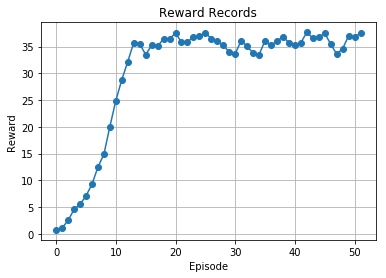

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores, 'o-')
plt.grid()
plt.title('Reward Records')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()